In [9]:
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 6, 3

In [10]:
with open('Compas_SP_MLP_Experiments.pkl', 'rb') as handle:
    GF_Experiments = pickle.load(handle)


In [11]:
true_sp = GF_Experiments['true_sp']
true_sp

0.2662898804467444

In [12]:
#Non_efficient_afa
non_efficient_afa = GF_Experiments['non-efficient_afa']
Exp_non_efficient_afa = non_efficient_afa['experiments']
Exp_non_efficient_afa.groupby(["Experiment"])["Estimated_Group_Fairness"].describe(percentiles=[])

,count,mean,std,min,50%,max
Experiment,,,,,,
1,10.0,0.119468,0.023219,0.092171,0.120532,0.159527
2,10.0,0.124431,0.011481,0.106352,0.124077,0.141802
3,10.0,0.118759,0.008777,0.106352,0.117578,0.131167
4,10.0,0.120089,0.006609,0.109897,0.121418,0.130281
5,10.0,0.121737,0.009501,0.112024,0.118759,0.138257
6,10.0,0.118227,0.004425,0.111669,0.117873,0.124668
7,10.0,0.119266,0.004847,0.109897,0.120279,0.125090
8,10.0,0.118804,0.005059,0.110783,0.119645,0.125406
9,10.0,0.118405,0.005373,0.110290,0.118562,0.125652


In [13]:
AFA_Mean_GF =[Exp_non_efficient_afa[Exp_non_efficient_afa["Experiment"] == i+1]["error"].mean() for i in range(10)]
AFA_std_GF = [Exp_non_efficient_afa[Exp_non_efficient_afa["Experiment"] == i+1]["error"].std() for i in range(10)]
AFA_lower_CI_GF = [AFA_Mean_GF[i] - 1.96* AFA_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
AFA_upper_CI_GF = [AFA_Mean_GF[i] + 1.96* AFA_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]

In [14]:
#efficient_afa
efficient_afa = GF_Experiments['efficient_afa']
Exp_efficient_afa = efficient_afa['experiments']
AFA_efficient_Mean_GF =[Exp_efficient_afa[Exp_efficient_afa["Experiment"] == i+1]["error"].mean() for i in range(10)]
AFA_efficient_std_GF = [Exp_efficient_afa[Exp_efficient_afa["Experiment"] == i+1]["error"].std() for i in range(10)]

AFA_efficient_lower_CI_GF = [AFA_efficient_Mean_GF[i] - 1.96* AFA_efficient_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
AFA_efficient_upper_CI_GF = [AFA_efficient_Mean_GF[i] + 1.96* AFA_efficient_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]


In [15]:
# baseline 1: iid
iid = GF_Experiments['iid']
Exp_iid = iid['experiments']

IID_Mean_GF = [Exp_iid[Exp_iid["Experiment"] == i+1]["error"].mean() for i in range(10)]
IID_std_GF = [Exp_iid[Exp_iid["Experiment"] == i+1]["error"].std() for i in range(10)]

IID_lower_CI_GF = [IID_Mean_GF[i] - 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
IID_upper_CI_GF = [IID_Mean_GF[i] + 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]

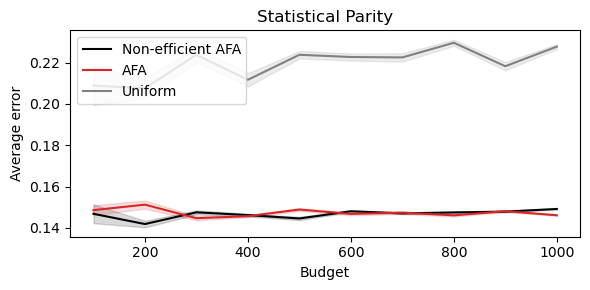

In [16]:
budgets_zhang = [500, 600, 800,900, 1000]
budgets = [100, 200, 300, 400, 500,600,700,800,900,1000]



plt.plot(budgets, AFA_Mean_GF, color = 'black', label="Non-efficient AFA")
plt.fill_between(budgets,AFA_lower_CI_GF, AFA_upper_CI_GF, color = 'black', alpha =.15)

plt.plot(budgets, AFA_efficient_Mean_GF, color = 'C3', label="AFA")
plt.fill_between(budgets,AFA_efficient_lower_CI_GF, AFA_efficient_upper_CI_GF, color = 'C3', alpha =.15)

plt.plot(budgets, IID_Mean_GF, color = 'grey', label="Uniform")
plt.fill_between(budgets,IID_lower_CI_GF, IID_upper_CI_GF, color = 'grey', alpha =.15)


plt.legend(loc = "upper left")
plt.ylabel("Average error")
plt.xlabel("Budget")
plt.tight_layout()
plt.title('Statistical Parity')
plt.tight_layout()
plt.savefig("GF_MLP_final.pdf")
plt.show()

In [10]:
print("Computation time for non efficient AFA is {}".format(GF_Experiments['non-efficient_afa']['computation_sp_afa']))
print("Computation time for efficient AFA is {}".format(GF_Experiments['efficient_afa']['computation_time_eff_afa']))
print("Computation time for  IID is {}".format(GF_Experiments['iid']['computation_sp_iid']))


Computation time for non efficient AFA is 17464.70456790924
Computation time for efficient AFA is 481.11255955696106
Computation time for  IID is 1.441091775894165


In [11]:
GF_Experiments['non-efficient_afa']['experiments']

,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.127622,0.138668
1,1,2,0.134712,0.131578
2,1,3,0.126440,0.139850
3,1,4,0.130281,0.136009
4,1,5,0.119823,0.146467
...,...,...,...,...
95,10,6,0.124668,0.141622
96,10,7,0.116987,0.149303
97,10,8,0.118316,0.147974
98,10,9,0.112260,0.154030


In [12]:
GF_Experiments['efficient_afa']['experiments']


,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.124077,0.142213
1,1,2,0.118759,0.147531
2,1,3,0.119350,0.146940
3,1,4,0.116987,0.149303
4,1,5,0.105643,0.160647
...,...,...,...,...
95,10,6,0.116396,0.149894
96,10,7,0.109390,0.156900
97,10,8,0.118316,0.147974
98,10,9,0.107927,0.158363


In [13]:
GF_Experiments['iid']['experiments']

,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.079208,0.187082
1,1,2,0.079602,0.186688
2,1,3,0.029900,0.236390
3,1,4,0.047382,0.218908
4,1,5,0.033932,0.232358
...,...,...,...,...
95,10,6,0.036606,0.229684
96,10,7,0.074180,0.192110
97,10,8,0.053683,0.212607
98,10,9,0.046615,0.219675
